# US Crude Oil Products Forecast

In [1]:
pip install prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [2]:
pip install --upgrade prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [3]:
pip install --upgrade cmdstanpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly


  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.6 MB 5.1 MB/s eta 0:00:04
    --------------------------------------- 0.3/15.6 MB 4.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/15.6 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/15.6 MB 4.1 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/15.6 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.6 MB 4.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/15.6 MB 4.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/15.6 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.6 MB 4.8 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.6 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/15.6 MB 4.7 MB/s eta 0:00:03
   ------ --------

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
import pickle
warnings.filterwarnings("ignore")

In [67]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
#/content/drive/MyDrive/Foundation_Project_2_Term-5/oil_prod_data.csv

Next, we will import US crude oil production data from US Energy regulator website, load that data into a pandas dataframe 'df'.

In [3]:
#df=pd.read_csv("C:/Users/umesh/OneDrive/Downloads/oil_prod_data.csv")
df=pd.read_csv("C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/oil_prod_data.csv")

In [4]:
df.head()

,Unnamed: 0,Date,Value,Status,Ticker,Description,Geography,Frequency,Dataset,Units,REF_AREA:Reference Area,ENERGY_PRODUCT:Energy product,FLOW_BREAKDOWN:Flow breakdown,UNIT_MEASURE:Unit of measure
0,0,1/1/2002,7150.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
1,1,2/1/2002,7071.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
2,2,3/1/2002,7096.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
3,3,4/1/2002,7074.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
4,4,5/1/2002,7031.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Value', 'Status', 'Ticker', 'Description',
       'Geography', 'Frequency', 'Dataset', 'Units', 'REF_AREA:Reference Area',
       'ENERGY_PRODUCT:Energy product', 'FLOW_BREAKDOWN:Flow breakdown',
       'UNIT_MEASURE:Unit of measure'],
      dtype='object')

In [6]:
# Select specific columns and create a new DataFrame

df_new = df[['Geography', 'ENERGY_PRODUCT:Energy product', 'Date', 'Value']]

In [7]:
df_new=df_new[df_new['Geography'] == 'United States']

In [8]:
df_new['Geography'].unique()

array(['United States'], dtype=object)

In [9]:
df_new['ENERGY_PRODUCT:Energy product'].unique()

array(['CRUDEOIL:Crude oil', 'NGL:NGL', 'OTHERCRUDE:Other'], dtype=object)

In [10]:
df_new['Geography'].nunique()

1

In [11]:
# Rename columns
df_new.rename(columns={'Date': 'Month', 'Value': 'US Total',
                       'ENERGY_PRODUCT:Energy product':'Product_type','Geography':'Country'}, inplace=True)

In [12]:
df_new['Product_type'] = df_new['Product_type'].apply(lambda x: x.split(':')[1])

In [13]:
# Convert 'Date' column to datetime
df_new['Month'] = pd.to_datetime(df_new['Month'])

In [78]:
#df_new['US Total'] = np.log(df_new['US Total'])  # Apply log transformation

In [14]:
df_new.dtypes

Country                 object
Product_type            object
Month           datetime64[ns]
US Total               float64
dtype: object

In [15]:
# Reset the index to start from 0
df_new.reset_index(drop=True, inplace=True)

In [16]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


In [17]:
df_new.to_csv('US_Crude_Oil_Production.csv', index=False)

# **Create Final dataset for both Crude,NGL & Other**

In [18]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


# Create filter dataset for Crude

In [19]:
df_crude=df_new[df_new['Product_type']=='Crude oil']

In [20]:
# Remove extra colmns

df_crude.drop(['Country','Product_type'],axis=1,inplace=True)

In [21]:
# Fill null values in case of NaN

df_crude.fillna(method='bfill',inplace=True)

In [22]:
df_crude['US Total'] = np.log(df_crude['US Total'])  # Apply log transformation

In [23]:
df_crude.head()

,Month,US Total
0,2002-01-01,8.673855
1,2002-02-01,8.677780
2,2002-03-01,8.679822
3,2002-04-01,8.675734
4,2002-05-01,8.686767


In [24]:
# Check if the the data is set up in proper format and then start modeling/forecasting.
df_crude.dtypes

Month       datetime64[ns]
US Total           float64
dtype: object

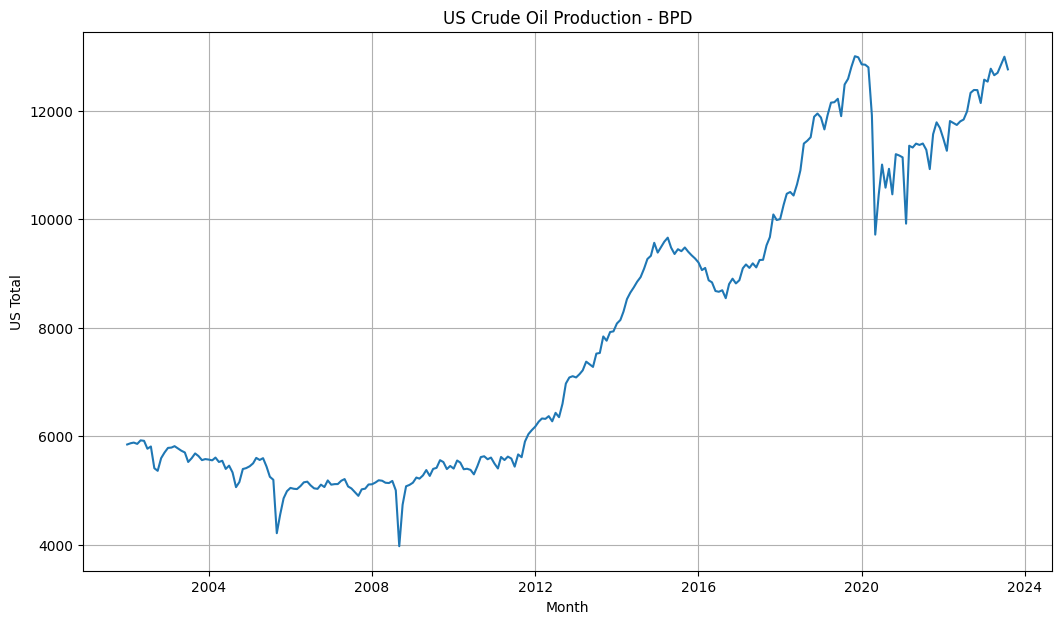

In [25]:
#Visualize the dataframe i.e. US total production in BPD

plt.figure(figsize=(12.5,7))
sns.lineplot(data=df_new[df_new['Product_type']=='Crude oil'], x="Month", y="US Total")
plt.title("US Crude Oil Production - BPD")
plt.grid(True)
plt.show()

Prophet expects that the format of the dataframe to be specific. The model expects a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

# **Save the final data after Pre-Processing**

In [26]:
df_crude.to_csv('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/US_CrudeOil_Final.csv', index=False)

# **Model-Testing & Hyper Parameter Tuning**

In [27]:
df_crude.columns = ["ds","y"]

#model = Prophet()

# Add a 'cap' column for carrying capacity to the dataset
# capacity_value = 13000  # Example capacity value, maximum data point in the
# df_crude['cap'] = capacity_value

# model = Prophet(
#     growth='linear',               # Model growth trend, either 'linear' or 'logistic'
#     yearly_seasonality='auto',     # Automatically detect yearly seasonality
#     weekly_seasonality='auto',     # Automatically detect weekly seasonality
#     daily_seasonality='auto',      # Automatically detect daily seasonality
#     holidays=None,                 # No holidays dataset included by default
#     seasonality_mode='multiplicative',   # Seasonality mode, either 'additive' or 'multiplicative'
#     seasonality_prior_scale=10.0,  # Strength of the seasonality model
#     holidays_prior_scale=10.0,     # Strength of the holiday components model
#     changepoint_prior_scale=0.1,  # Flexibility of the automatic changepoint selection
#     mcmc_samples=0,                # Number of MCMC samples to draw. Default (0) uses Maximum a Posteriori estimation
#     interval_width=0.80,           # Width of the uncertainty intervals provided for the forecast
#     uncertainty_samples=1000       # Number of simulated draws used to estimate uncertainty intervals
# )

# model.fit(df_crude)

# Grid Search for the Best Model:

In [36]:
# from prophet import Prophet
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

# # Define a range of parameters to test
# param_grid = {
#     'changepoint_prior_scale': [0.0001,0.001, 0.01, 0.1,0.25,0.45, 0.55, 0.65, 0.75, 0.85,0.95],
#     'seasonality_prior_scale': [1.0, 5.0, 10.0,12,15.0,18, 20.0,24],
#     'holidays_prior_scale': [0.1, 1.0, 3.0, 6.0, 9.0, 10.0, 12.0],
#     'seasonality_mode': ['additive', 'multiplicative']
# }

# # Placeholder for the best parameters and score
# best_params = None
# best_score = float('inf')

# # Loop over all combinations of parameters
# for cps in param_grid['changepoint_prior_scale']:
#     for sps in param_grid['seasonality_prior_scale']:
#         for hps in param_grid['holidays_prior_scale']:
#             for sm in param_grid['seasonality_mode']:
#                 # Create and fit the model
#                 model = Prophet(
#                     growth='linear',
#                     yearly_seasonality='auto',
#                     weekly_seasonality='auto',
#                     daily_seasonality='auto',
#                     holidays=None,
#                     seasonality_mode=sm,
#                     seasonality_prior_scale=sps,
#                     holidays_prior_scale=hps,
#                     changepoint_prior_scale=cps,
#                     mcmc_samples=0,
#                     interval_width=0.80,
#                     uncertainty_samples=500
#                 )
#                 model.fit(df_crude)

#                 # Make predictions (you'll need a future dataframe for this)
#                 future = model.make_future_dataframe(periods= 19, freq='m')
#                 forecast = model.predict(future)

#                 # Evaluate the model (use an appropriate method based on your data)
#                 # Here's an example using RMSE
#                 y_true = df_crude['y']
#                 y_pred = forecast['yhat'][:len(y_true)]
#                 score = np.sqrt(mean_squared_error(y_true, y_pred))

#                 # Update best score and parameters
#                 if score < best_score:
#                     best_score = score
#                     best_params = {
#                         'changepoint_prior_scale': cps,
#                         'seasonality_prior_scale': sps,
#                         'holidays_prior_scale': hps,
#                         'seasonality_mode': sm
#                     }

# # Print the best parameters
# print(f"Best Parameters: {best_params}")


In [28]:
import logging
logging.getLogger().setLevel(logging.ERROR)  # Set to ERROR, WARNING, INFO, or CRITICAL

In [29]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import logging
logging.getLogger().setLevel(logging.ERROR)  # Set to ERROR, WARNING, INFO, or CRITICAL

# Add a 'cap' column for carrying capacity to the dataset

capacity_value = 13000  # Maximum capacity value, adjust it as per your data
#df_crude['cap'] = capacity_value

# Define a range of parameters to test
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.35, 0.6, 0.75, 0.95],
    'seasonality_prior_scale': [1.0 , 5.0, 10.0, 12.0, 18.0, 24],
    'holidays_prior_scale': [0.1, 1.0, 3.0, 6.0, 9.0, 10.0],
    'seasonality_mode': ['additive','multiplicative']
}

# # Define a range of parameters to test
# param_grid = {
#     'changepoint_prior_scale': [0.0001,0.001, 0.01, 0.1,0.25,0.45, 0.55, 0.65, 0.75, 0.85,0.95],
#     'seasonality_prior_scale': [1.0, 5.0, 10.0,12,15.0,18, 20.0,24],
#     'holidays_prior_scale': [0.1, 1.0, 3.0, 6.0, 9.0, 10.0, 12.0],
#     'seasonality_mode': ['additive', 'multiplicative']
# }

# Placeholder for the best parameters and score
best_params = None
best_score = float('inf')

# Loop over all combinations of parameters
for sm in param_grid['seasonality_mode']:
    for sps in param_grid['seasonality_prior_scale']:
        for hps in param_grid['holidays_prior_scale']:
            for cps in param_grid['changepoint_prior_scale']:

                # Create and fit the model
                model = Prophet(
                    growth='linear',
                    yearly_seasonality='auto',
                    weekly_seasonality='auto',
                    daily_seasonality='auto',
                    holidays=None,
                    seasonality_mode=sm,
                    seasonality_prior_scale=sps,
                    holidays_prior_scale=hps,
                    changepoint_prior_scale=cps,
                    mcmc_samples=0,
                    interval_width=0.80,
                    uncertainty_samples=1000
                )

                model.fit(df_crude)

                # Make predictions (you'll need a future dataframe for this)
                future = model.make_future_dataframe(periods=60)  # Adjust as needed
                #future['cap'] = capacity_value
                forecast = model.predict(future)
                forecast['yhat'] = np.exp(forecast['yhat'])
                forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
                forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

                # Evaluate the model (use an appropriate method based on your data)
                y_true = df_crude['y']
                y_pred = forecast['yhat'][:len(y_true)]
                score = np.sqrt(mean_squared_error(y_true, y_pred))

                # Update the best score and parameters
                if score < best_score:

                    best_score = score
                    best_params = {
                        'seasonality_mode': sm,
                        'seasonality_prior_scale': sps,
                        'holidays_prior_scale': hps,
                        'changepoint_prior_scale': cps
                    }
                best_model = model


                
# Save the best model using pickle
if best_model is not None:
    with open('best_model_with_params.pkl', 'wb') as model_file:
        pickle.dump((best_model, best_params), model_file)                

# Print the best parameters
print(f"Best Parameters: {best_params}")


01:39:50 - cmdstanpy - INFO - Chain [1] start processing
01:39:50 - cmdstanpy - INFO - Chain [1] done processing
01:39:50 - cmdstanpy - INFO - Chain [1] start processing
01:39:51 - cmdstanpy - INFO - Chain [1] done processing
01:39:51 - cmdstanpy - INFO - Chain [1] start processing
01:39:51 - cmdstanpy - INFO - Chain [1] done processing
01:39:52 - cmdstanpy - INFO - Chain [1] start processing
01:39:52 - cmdstanpy - INFO - Chain [1] done processing
01:39:53 - cmdstanpy - INFO - Chain [1] start processing
01:39:53 - cmdstanpy - INFO - Chain [1] done processing
01:39:53 - cmdstanpy - INFO - Chain [1] start processing
01:39:54 - cmdstanpy - INFO - Chain [1] done processing
01:39:54 - cmdstanpy - INFO - Chain [1] start processing
01:39:54 - cmdstanpy - INFO - Chain [1] done processing
01:39:55 - cmdstanpy - INFO - Chain [1] start processing
01:39:55 - cmdstanpy - INFO - Chain [1] done processing
01:39:55 - cmdstanpy - INFO - Chain [1] start processing
01:39:56 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 18.0, 'holidays_prior_scale': 0.1, 'changepoint_prior_scale': 0.01}


In [30]:
best_params

{'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 18.0,
 'holidays_prior_scale': 0.1,
 'changepoint_prior_scale': 0.01}

In [31]:
# Load the pickled model and its parameters
with open('models/best_model_with_params.pkl', 'rb') as model_file:
    loaded_model, loaded_params = pickle.load(model_file)


In [32]:
loaded_model.params

OrderedDict([('lp__', array([[1298.02]])),
             ('k', array([[-0.13484]])),
             ('m', array([[0.917504]])),
             ('delta',
              array([[ 0.152809  , -0.135154  ,  0.0292714 , -0.0011674 , -0.110435  ,
                       0.360663  , -0.197834  ,  0.00118578, -0.0391772 ,  0.463879  ,
                      -0.439536  ,  0.0878505 ,  0.118363  ,  0.186122  ,  0.00787224,
                      -0.0470942 ,  0.0920987 , -0.0713413 , -0.422213  , -0.141331  ,
                       0.351799  ,  0.170998  ,  0.189522  , -0.401098  , -0.0511751 ]])),
             ('sigma_obs', array([[0.00404902]])),
             ('beta',
              array([[ 1.51232e-03,  1.67293e-03,  1.80690e-03,  4.60137e-03,
                      -1.80954e-02,  4.30933e-03,  4.44925e-03,  1.21255e-03,
                       2.60568e-03,  2.40544e-03,  5.07416e-03,  4.37605e-04,
                       3.07621e-03, -2.58495e-03,  5.17917e-03,  1.80436e-05,
                      -1.717

In [33]:
model.params

OrderedDict([('lp__', array([[1298.02]])),
             ('k', array([[-0.13484]])),
             ('m', array([[0.917504]])),
             ('delta',
              array([[ 0.152809  , -0.135154  ,  0.0292714 , -0.0011674 , -0.110435  ,
                       0.360663  , -0.197834  ,  0.00118578, -0.0391772 ,  0.463879  ,
                      -0.439536  ,  0.0878505 ,  0.118363  ,  0.186122  ,  0.00787224,
                      -0.0470942 ,  0.0920987 , -0.0713413 , -0.422213  , -0.141331  ,
                       0.351799  ,  0.170998  ,  0.189522  , -0.401098  , -0.0511751 ]])),
             ('sigma_obs', array([[0.00404902]])),
             ('beta',
              array([[ 1.51232e-03,  1.67293e-03,  1.80690e-03,  4.60137e-03,
                      -1.80954e-02,  4.30933e-03,  4.44925e-03,  1.21255e-03,
                       2.60568e-03,  2.40544e-03,  5.07416e-03,  4.37605e-04,
                       3.07621e-03, -2.58495e-03,  5.17917e-03,  1.80436e-05,
                      -1.717

Now its time to start forecasting. With Prophet, we start by building some future time data with the following command:

In [34]:
future = model.make_future_dataframe(periods= 36, freq='m')

In [35]:
# Change the day of each date to '01'
future['ds'] = future['ds'].apply(lambda x: x.replace(day=1))

In this line of code, we created a pandas dataframe with 60 (periods = 60) future data points with a monthly frequency (freq = ‘m’). In the next line of code, we check the last five dates of the forecasted data.

In [36]:
future.tail()

,ds
291,2026-03-01
292,2026-04-01
293,2026-05-01
294,2026-06-01
295,2026-07-01


Now, we will try to predict the actual values using Prophet library and check the last five elements of the forecast.

In [37]:
forecast = model.predict(future)
forecast['trend'] = np.exp(forecast['trend'])
forecast['trend_lower'] = np.exp(forecast['trend_lower'])
forecast['trend_upper'] = np.exp(forecast['trend_upper'])

forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

forecast['multiplicative_terms'] = np.exp(forecast['multiplicative_terms'])
forecast['multiplicative_terms_lower'] = np.exp(forecast['multiplicative_terms_lower'])
forecast['multiplicative_terms_upper'] = np.exp(forecast['multiplicative_terms_upper'])

forecast['yearly'] = np.exp(forecast['yearly'])
forecast['yearly_lower'] = np.exp(forecast['yearly_lower'])
forecast['yearly_upper'] = np.exp(forecast['yearly_upper'])

forecast['additive_terms'] = np.exp(forecast['additive_terms'])
forecast['additive_terms_lower'] = np.exp(forecast['additive_terms_lower'])
forecast['additive_terms_upper'] = np.exp(forecast['additive_terms_upper'])

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
291,2026-03-01,12443.970012,9279.897519,16726.039641,9140.486318,16579.616045,1.000605,1.000605,1.000605,1.000605,1.000605,1.000605,1.0,1.0,1.0,12515.127991
292,2026-04-01,12453.263144,8982.371278,16837.177332,9117.522988,16857.940471,1.000154,1.000154,1.000154,1.000154,1.000154,1.000154,1.0,1.0,1.0,12471.338032
293,2026-05-01,12462.263106,8922.284872,16979.458639,9016.814182,17267.233307,0.999432,0.999432,0.999432,0.999432,0.999432,0.999432,1.0,1.0,1.0,12395.620707
294,2026-06-01,12471.569900,8690.373810,17219.092816,8890.543671,17514.856056,0.998659,0.998659,0.998659,0.998659,0.998659,0.998659,1.0,1.0,1.0,12314.748464
295,2026-07-01,12480.583092,8585.759443,17533.984934,8727.869574,17736.468616,0.998023,0.998023,0.998023,0.998023,0.998023,0.998023,1.0,1.0,1.0,12249.838147


If we take a look at the data using .tail(), we notice there are a bunch of columns in the forecast dataframe. The important ones (for now) are ‘ds’ (datetime), ‘yhat’ (forecast), ‘yhat_lower’ and ‘yhat_upper’ (uncertainty levels).

In [38]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2002-01-01,5935.389028,5662.034120,6266.794279
1,2002-02-01,5860.085482,5586.671824,6132.619139
2,2002-03-01,5924.984491,5633.014967,6224.227722
3,2002-04-01,5872.256122,5577.517871,6164.121866
4,2002-05-01,5807.279741,5520.773720,6087.874004


In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2002-01-01,5950.582511,5662.034120,6266.794279,5950.582511,5950.582511,0.999706,0.999706,0.999706,0.999706,0.999706,0.999706,1.0,1.0,1.0,5935.389028
1,2002-02-01,5920.763923,5586.671824,6132.619139,5920.763923,5920.763923,0.998815,0.998815,0.998815,0.998815,0.998815,0.998815,1.0,1.0,1.0,5860.085482
2,2002-03-01,5893.959457,5633.014967,6224.227722,5893.959457,5893.959457,1.000605,1.000605,1.000605,1.000605,1.000605,1.000605,1.0,1.0,1.0,5924.984491
3,2002-04-01,5864.424610,5577.517871,6164.121866,5864.424610,5864.424610,1.000154,1.000154,1.000154,1.000154,1.000154,1.000154,1.0,1.0,1.0,5872.256122
4,2002-05-01,5835.983422,5520.773720,6087.874004,5835.983422,5835.983422,0.999432,0.999432,0.999432,0.999432,0.999432,0.999432,1.0,1.0,1.0,5807.279741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2026-03-01,12443.970012,9279.897519,16726.039641,9140.486318,16579.616045,1.000605,1.000605,1.000605,1.000605,1.000605,1.000605,1.0,1.0,1.0,12515.127991
292,2026-04-01,12453.263144,8982.371278,16837.177332,9117.522988,16857.940471,1.000154,1.000154,1.000154,1.000154,1.000154,1.000154,1.0,1.0,1.0,12471.338032
293,2026-05-01,12462.263106,8922.284872,16979.458639,9016.814182,17267.233307,0.999432,0.999432,0.999432,0.999432,0.999432,0.999432,1.0,1.0,1.0,12395.620707
294,2026-06-01,12471.569900,8690.373810,17219.092816,8890.543671,17514.856056,0.998659,0.998659,0.998659,0.998659,0.998659,0.998659,1.0,1.0,1.0,12314.748464


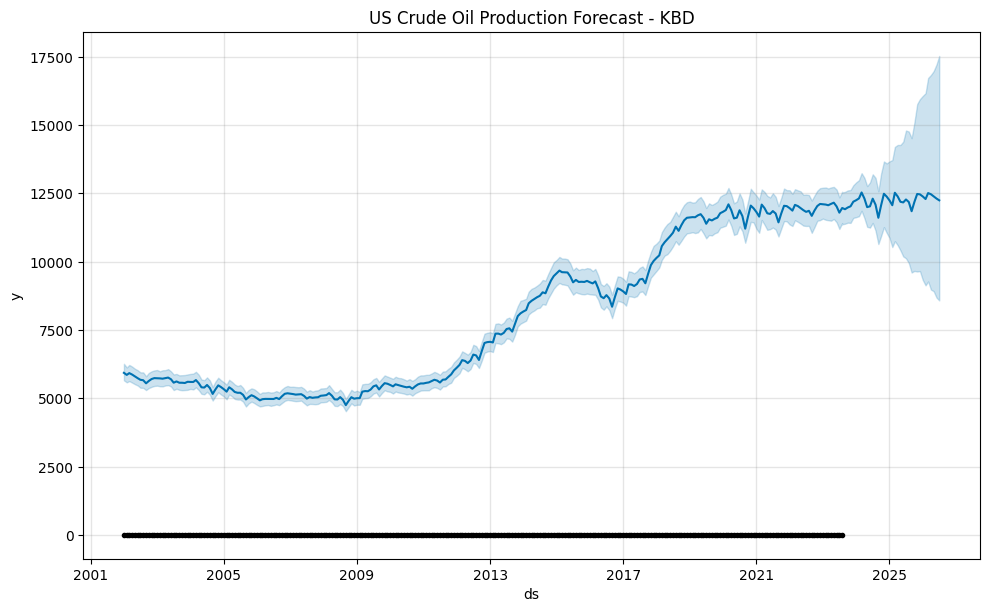

In [40]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("US Crude Oil Production Forecast - KBD")
plt.show()

In [41]:
df_crude['y'] = np.exp(df_crude['y'])

In [42]:
df_crude.head()

,ds,y
0,2002-01-01,5848.0
1,2002-02-01,5871.0
2,2002-03-01,5883.0
3,2002-04-01,5859.0
4,2002-05-01,5924.0


Next, we will check the model robustness using the best metrics for measuring accuracy of this model. Utilizing a combination of R-Squared, Mean Squared Error and Mean Absolute Error will help us to gauge the quality of our model. We will Python's Scikit-Learn library to quickly calculate these metrics.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = df_crude['y'][:260].values
y_pred = forecast['yhat'][:260].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)

MAE: 222.53
R-squared Score: 0.98


For the US crude oil time-series data, the Prophet model gives an R-squared value of 0.98 i.e. 98% of variance in our data set is explained by the model. The MAE is calculated to be 222.49 i.e. for each data point, the average magnitude error is roughly 222.49 barrels, considering that our production value is in thousands of barrels.

Finally, we create a plot to compare actual vs. predicted values to give a clear understanding of how our model visually looks against the existing US crude oil production dataset.

In [44]:
df_crude.tail()

,ds,y
255,2023-04-01,12650.0
256,2023-05-01,12694.0
257,2023-06-01,12844.0
258,2023-07-01,12991.0
259,2023-08-01,12758.0


# Merge Actual & Forecast dataset based on 'ds'(Date Column)

In [45]:
merged_df = df_crude.merge(forecast, on='ds', how='outer')

In [46]:
merged_df.tail()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
291,2026-03-01,NaN,12443.970012,9279.897519,16726.039641,9140.486318,16579.616045,1.000605,1.000605,1.000605,1.000605,1.000605,1.000605,1.0,1.0,1.0,12515.127991
292,2026-04-01,NaN,12453.263144,8982.371278,16837.177332,9117.522988,16857.940471,1.000154,1.000154,1.000154,1.000154,1.000154,1.000154,1.0,1.0,1.0,12471.338032
293,2026-05-01,NaN,12462.263106,8922.284872,16979.458639,9016.814182,17267.233307,0.999432,0.999432,0.999432,0.999432,0.999432,0.999432,1.0,1.0,1.0,12395.620707
294,2026-06-01,NaN,12471.569900,8690.373810,17219.092816,8890.543671,17514.856056,0.998659,0.998659,0.998659,0.998659,0.998659,0.998659,1.0,1.0,1.0,12314.748464
295,2026-07-01,NaN,12480.583092,8585.759443,17533.984934,8727.869574,17736.468616,0.998023,0.998023,0.998023,0.998023,0.998023,0.998023,1.0,1.0,1.0,12249.838147


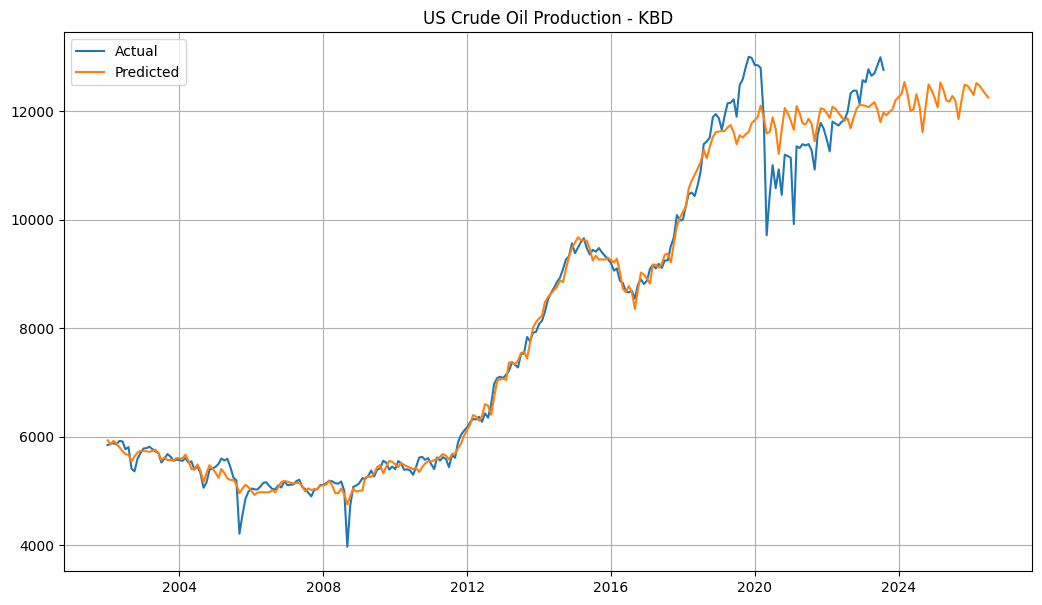

In [47]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(merged_df['ds'],merged_df['y'], label='Actual')
plt.plot(merged_df['ds'],merged_df['yhat'], label='Predicted')
plt.title("US Crude Oil Production - KBD")
plt.grid(True)
plt.legend()

# Save the plot as a PNG file
plt.savefig("Prophet_crude_oil_production_plot.png")

# Show the plot (optional)
plt.show()


# **Evaluation Metrics**

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

y_true = df_crude['y'][:260].values
y_pred = forecast['yhat'][:260].values

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_true, y_pred))
print("RMSE: ", rmse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE: ", mae)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: ", mape, "%")

RMSE:  375.24526088450006
MAE:  222.53002979965856
MAPE:  2.528382410587776 %


In [50]:
# Save the results to a text file
crudeoil_results_file_path = "metrics_results.txt"
with open(crudeoil_results_file_path, 'w') as file:
    file.write(f"RMSE: {rmse}\n")
    file.write(f"MAE: {mae}\n")
    file.write(f"MAPE: {mape}%\n")

print(f"Metrics results saved to {crudeoil_results_file_path}")

Metrics results saved to metrics_results.txt


# **Save the Model**

In [59]:
# Save the model to a file
with open('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/US_Crude_prophetModel.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Load the Model**

In [60]:
# Load the model from the file
with open('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/US_Crude_prophetModel.pkl', 'rb') as f:
    US_Crude_loaded_model = pickle.load(f)

In [61]:
US_Crude_loaded_model.params

OrderedDict([('lp__', array([[1298.02]])),
             ('k', array([[-0.13484]])),
             ('m', array([[0.917504]])),
             ('delta',
              array([[ 0.152809  , -0.135154  ,  0.0292714 , -0.0011674 , -0.110435  ,
                       0.360663  , -0.197834  ,  0.00118578, -0.0391772 ,  0.463879  ,
                      -0.439536  ,  0.0878505 ,  0.118363  ,  0.186122  ,  0.00787224,
                      -0.0470942 ,  0.0920987 , -0.0713413 , -0.422213  , -0.141331  ,
                       0.351799  ,  0.170998  ,  0.189522  , -0.401098  , -0.0511751 ]])),
             ('sigma_obs', array([[0.00404902]])),
             ('beta',
              array([[ 1.51232e-03,  1.67293e-03,  1.80690e-03,  4.60137e-03,
                      -1.80954e-02,  4.30933e-03,  4.44925e-03,  1.21255e-03,
                       2.60568e-03,  2.40544e-03,  5.07416e-03,  4.37605e-04,
                       3.07621e-03, -2.58495e-03,  5.17917e-03,  1.80436e-05,
                      -1.717